# What is Pneumonia ?
From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

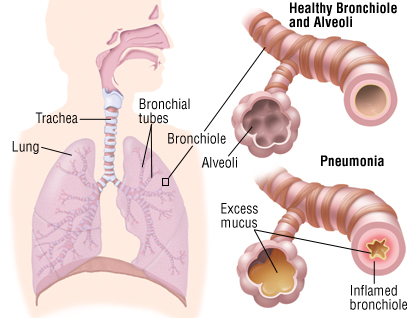

# Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be realized using Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

# The convolution process is illustrated below

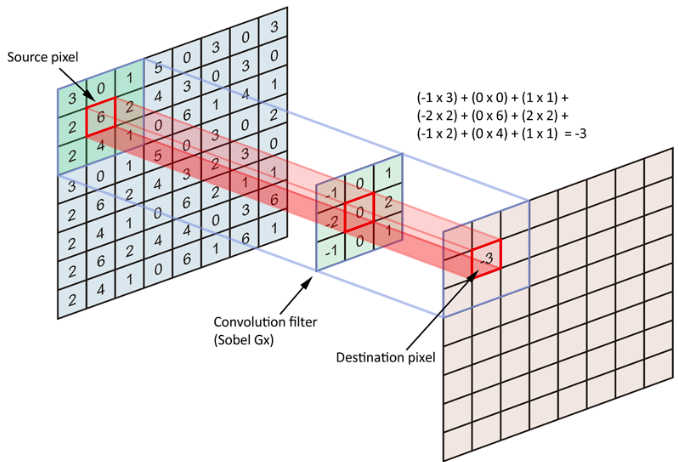

Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.

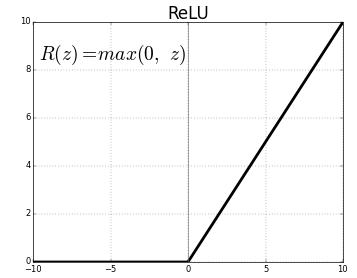

Features are the enhanced with MaxPool layers
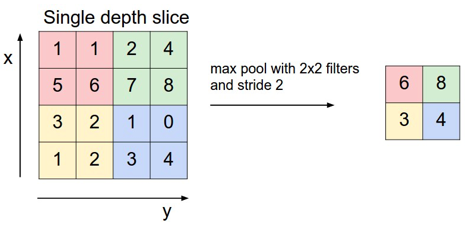

The stride parameters determines the distance between each filters. The padding one determines if we ignore the borderline pixels or not (adding zeros helps the neural network to get information on the border)

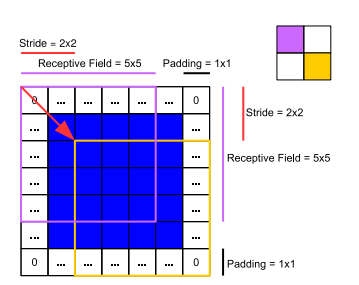

The outputs are then concatened in Dense layers

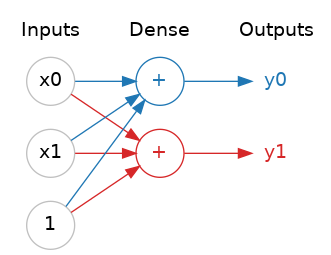

By using a sigmoid activation, the neural network determines which class the image belongs to
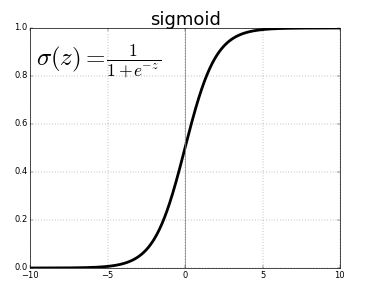

#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [12]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir(r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray")

['chest_xray', 'test', 'train', 'val', '__MACOSX']

In [14]:
len(os.listdir(r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\PNEUMONIA"))

3875

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


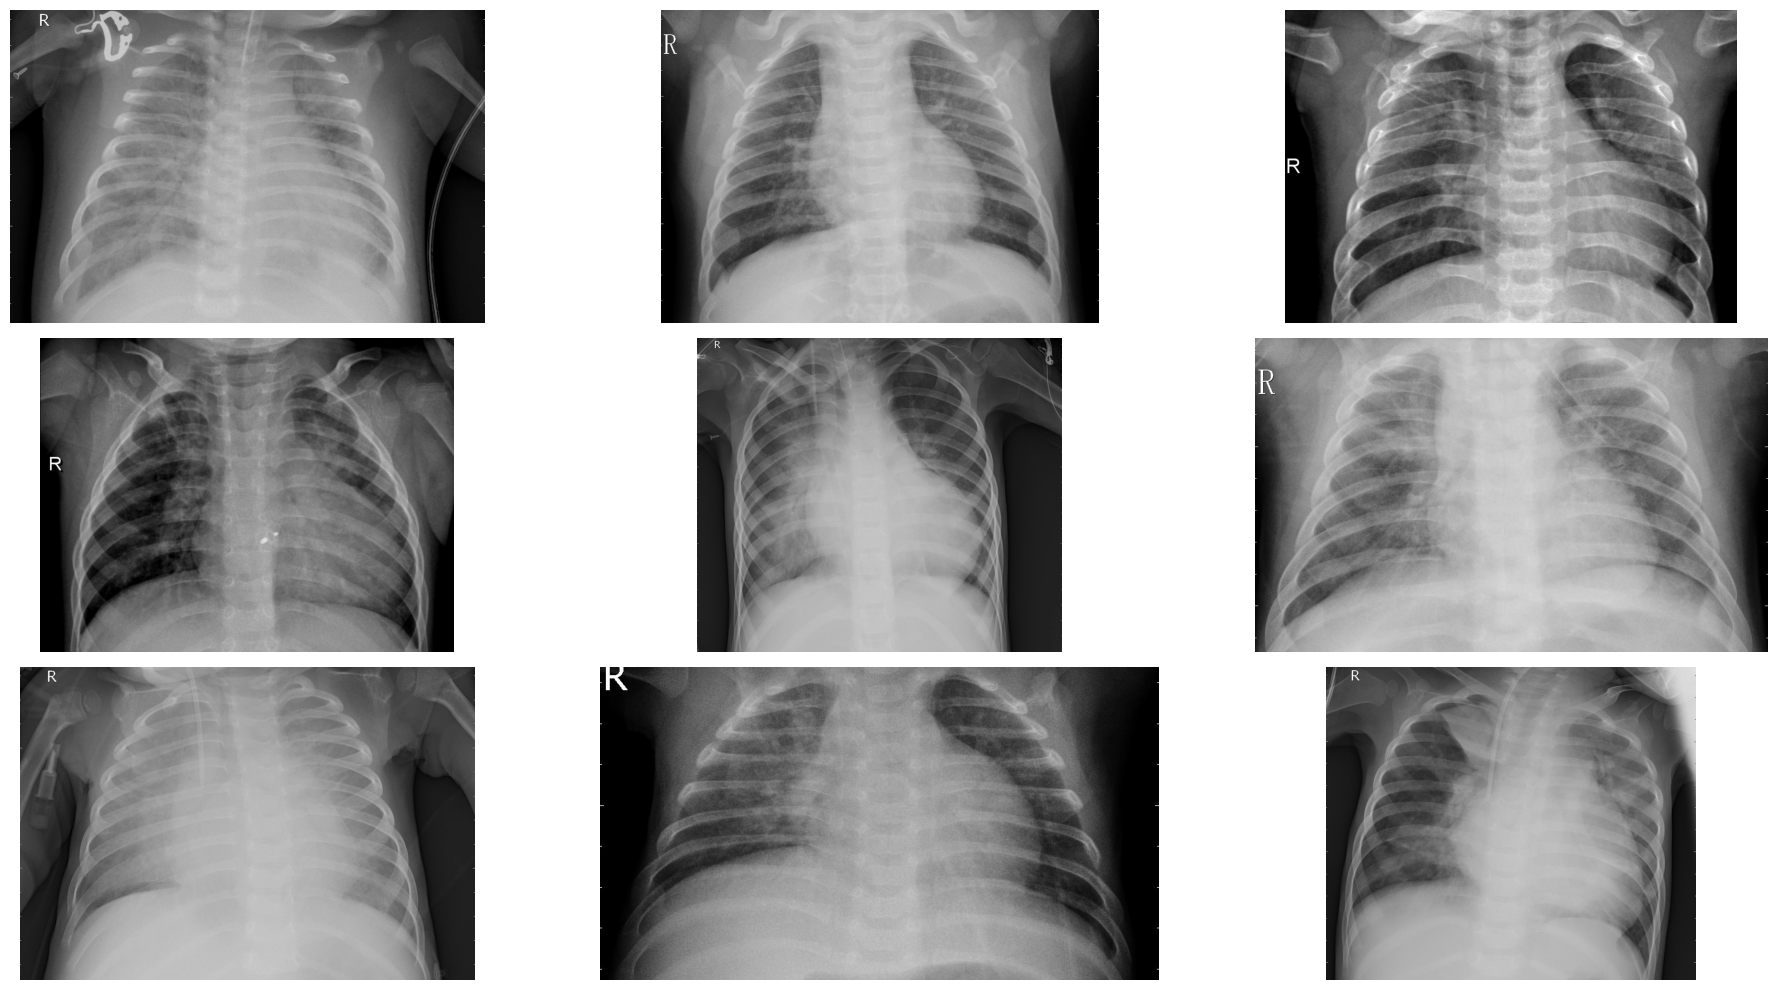

In [20]:
train_dir = r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train"
test_dir = r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\test"
val_dir = r"Lung_Disease_Detection_Deep_Learning-main/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia_dir = r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\PNEUMONIA"
pneumonia = os.listdir(pneumonia_dir)

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i])) 
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

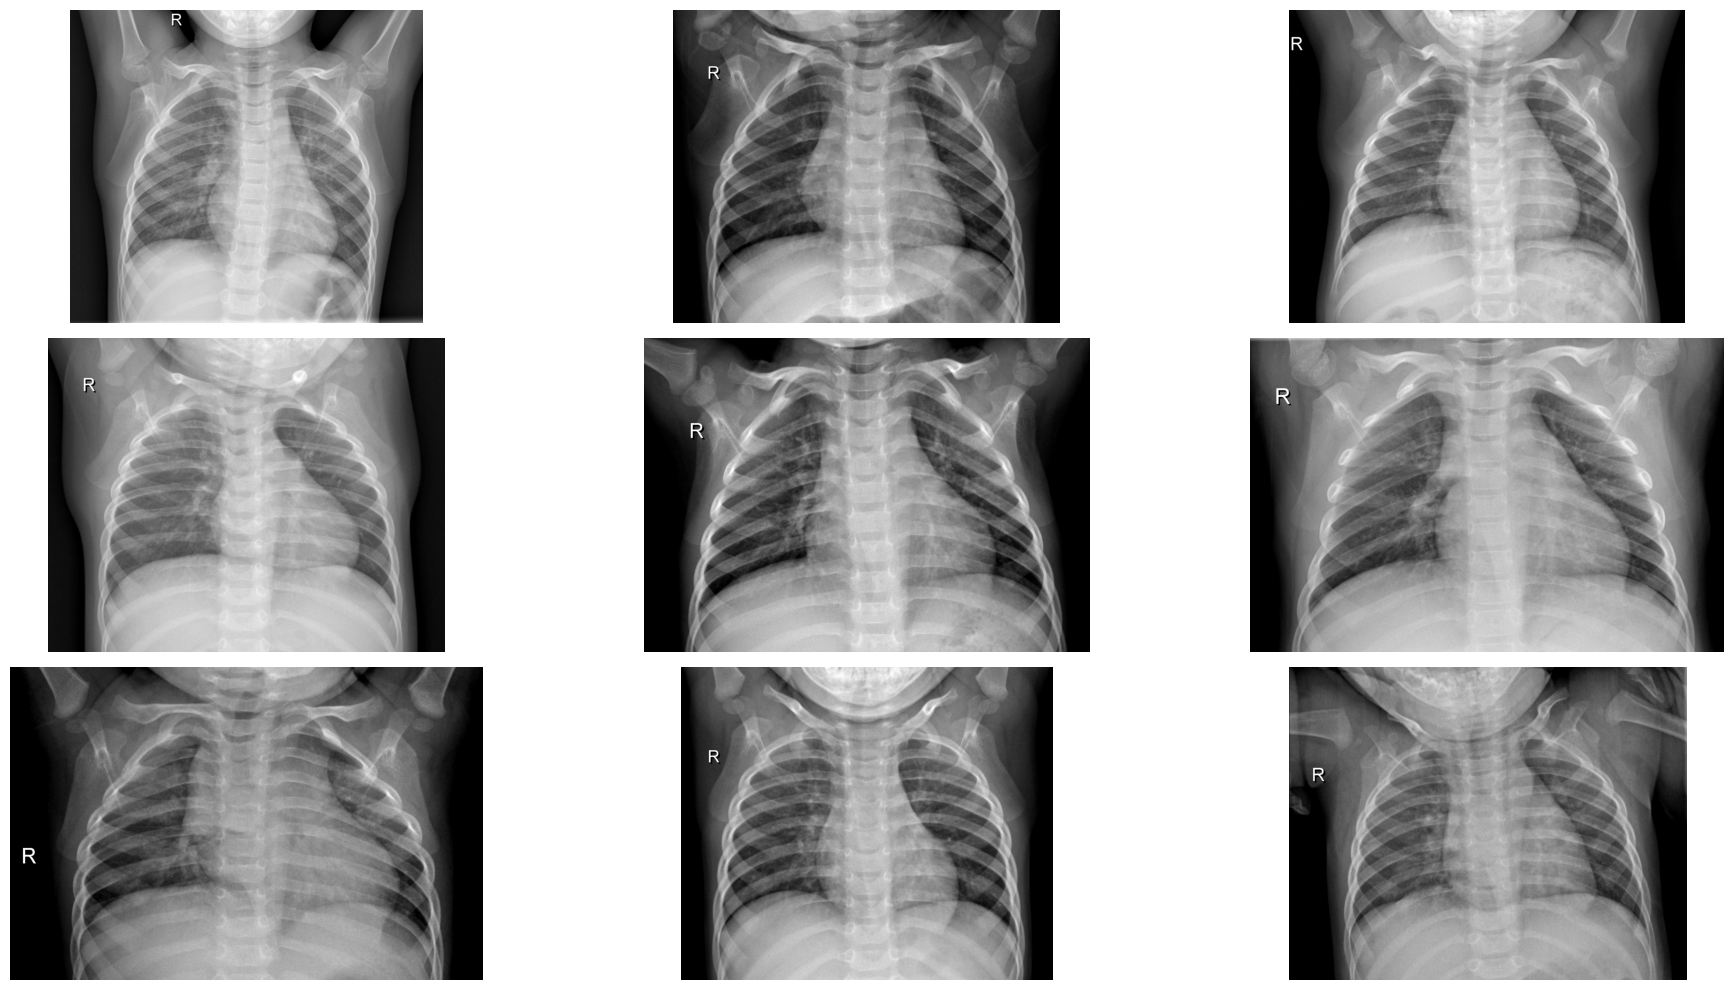

In [21]:
normal = os.listdir(r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\NORMAL")
normal_dir = r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1858 pixels width and 2090 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 128.9075 and the standard deviation is 62.3010


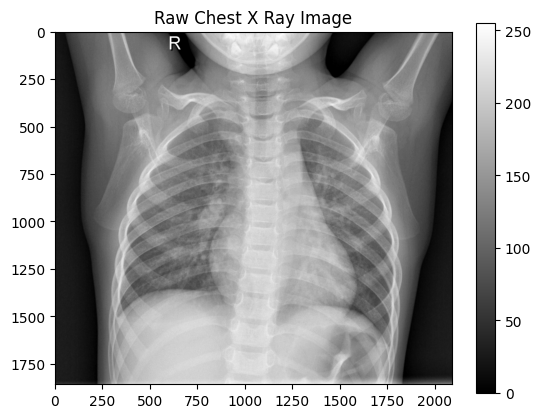

In [22]:
normal_img = os.listdir(r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\NORMAL")[0]
normal_dir = r"C:\Users\HP\Downloads\Lung_Disease_Detection_Deep_Learning-main\Lung_Disease_Detection_Deep_Learning-main\chest_xray\train\NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_28276\2497118673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

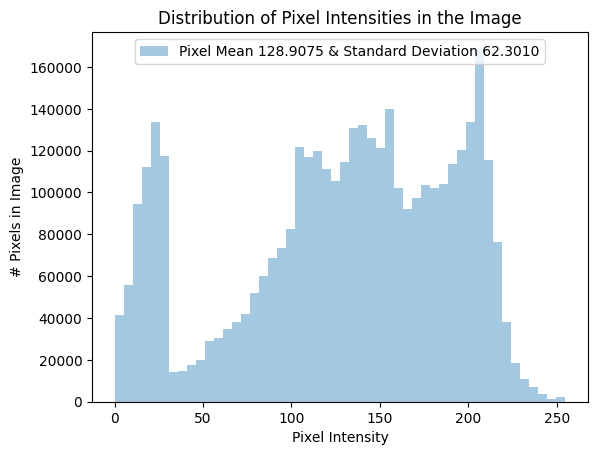

In [23]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [24]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

Now we need to build a new generator for validation and t esting data.

Why can't use the same generator as for the training data?

Look back at the generator we wrote for the training data.

It normalizes each image per batch, meaning thatit uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

In [25]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.3979 and the minimum is -2.6865
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


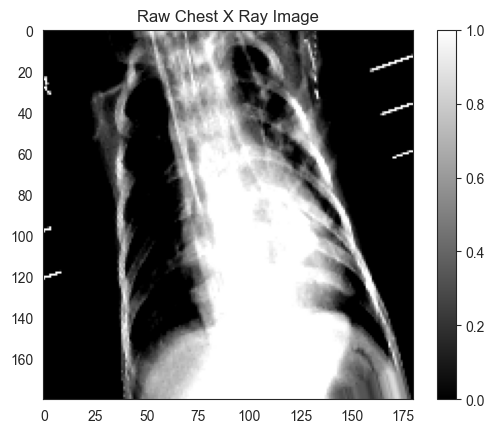

In [26]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

C:\Users\HP\AppData\Local\Temp\ipykernel_28276\1221570370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

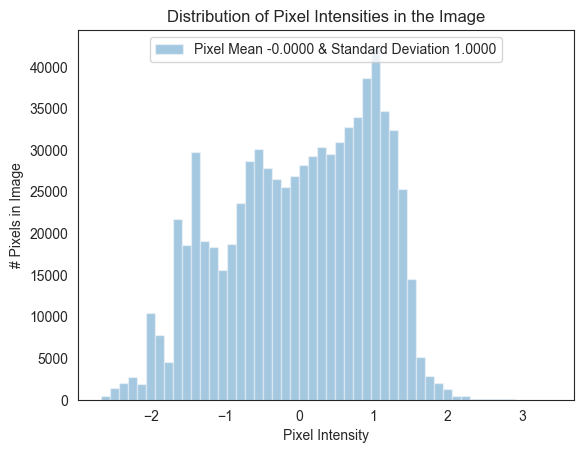

In [27]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [28]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 178, 178, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_13 (Ba  (None, 176, 176, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 88, 88, 32)        0         
 g2D)                                                            
                                                      

WARNING: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 25 batches). You may need to use the repeat() function when building your dataset.


100/100 [==============================] - 64s 611ms/step - loss: 0.1839 - accuracy: 0.7912 - val_loss: 5.5353 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
100/100 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.7900

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 55s 553ms/step - loss: 0.1649 - accuracy: 0.7900 - lr: 0.0010
Epoch 3/15
100/100 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.7750

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 57s 565ms/step - loss: 0.1718 - accuracy: 0.7750 - lr: 0.0010
Epoch 4/15
100/100 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.8062

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 59s 583ms/step - loss: 0.1511 - accuracy: 0.8062 - lr: 0.0010
Epoch 5/15
100/100 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.8125

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 58s 576ms/step - loss: 0.1503 - accuracy: 0.8125 - lr: 0.0010
Epoch 6/15
100/100 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.8413

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 58s 578ms/step - loss: 0.1274 - accuracy: 0.8413 - lr: 0.0010
Epoch 7/15
100/100 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.8438

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 57s 570ms/step - loss: 0.1392 - accuracy: 0.8438 - lr: 0.0010
Epoch 8/15
100/100 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.8687

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 62s 618ms/step - loss: 0.1174 - accuracy: 0.8687 - lr: 0.0010
Epoch 9/15
100/100 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.8750

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 65s 648ms/step - loss: 0.1118 - accuracy: 0.8750 - lr: 0.0010
Epoch 10/15
100/100 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.8600

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 67s 667ms/step - loss: 0.1272 - accuracy: 0.8600 - lr: 0.0010
Epoch 11/15
100/100 [==============================] - ETA: 0s - loss: 0.1194 - accuracy: 0.8587

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 260s 3s/step - loss: 0.1194 - accuracy: 0.8587 - lr: 0.0010
Epoch 12/15
100/100 [==============================] - ETA: 0s - loss: 0.1255 - accuracy: 0.8475

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 70s 701ms/step - loss: 0.1255 - accuracy: 0.8475 - lr: 0.0010
Epoch 13/15
100/100 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.8587

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 59s 592ms/step - loss: 0.1248 - accuracy: 0.8587 - lr: 0.0010
Epoch 14/15
100/100 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.8487

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


100/100 [==============================] - 61s 609ms/step - loss: 0.1478 - accuracy: 0.8487 - lr: 0.0010
Epoch 15/15
100/100 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.8650

WARNING: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


WARNING: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


624/624 [==============================] - 22s 35ms/step - loss: 0.4224 - accuracy: 0.8413
Test Accuracy: 84.13%
652/652 [==============================] - 183s 281ms/step - loss: 0.2159 - accuracy: 0.9135
Train Accuracy: 91.35%


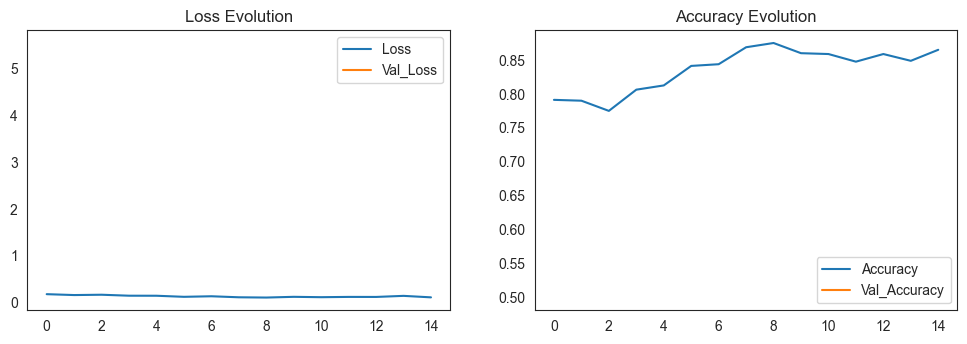

In [35]:
#--addonImports--
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

#Layer1
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Layer2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Layer3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#reduceParams
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

#callBacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

r = model.fit(
    train, 
    epochs=15,  #-->inc
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
    callbacks=[early_stopping, reduce_lr]
)

#plot
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

#eval
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 34s 52ms/step
[[156  78]
 [ 29 361]]


,0,1,accuracy,macro avg,weighted avg
precision,0.843243,0.822323,0.828526,0.832783,0.830168
recall,0.666667,0.925641,0.828526,0.796154,0.828526
f1-score,0.744630,0.870929,0.828526,0.807779,0.823567
support,234.000000,390.000000,0.828526,624.000000,624.000000


In [37]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[184  50]
 [ 44 346]]


,0,1,accuracy,macro avg,weighted avg
precision,0.807018,0.873737,0.849359,0.840377,0.848717
recall,0.786325,0.887179,0.849359,0.836752,0.849359
f1-score,0.796537,0.880407,0.849359,0.838472,0.848956
support,234.000000,390.000000,0.849359,624.000000,624.000000
